# Intro to Matplotlib

Matplotlib is a data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack.

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends. It supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish.

In recent years the interface and style of Matplotlib have begun to show their age. Newer tools like ggplot and ggvis in the R language, along with web visualization toolkits based on D3js and HTML5 canvas, often make Matplotlib feel clunky and old-fashioned.

Still, we cannot ignore Matplotlib's strength as a well-tested, cross-platform graphics engine. Recent updates make it  easy to set new global plotting styles (see [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb)), and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, Seaborn (discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)), [ggpy](http://yhat.github.io/ggpy/), [HoloViews](http://holoviews.org/), [Altair](http://altair-viz.github.io/), and even Pandas itself can be used as wrappers around Matplotlib's API.

## General Matplotlib Tips

Before we dive into the details of creating visualizations with Matplotlib, there are a few useful things you should know about using the package.

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

The ``plt`` interface is what we will use most often, as we shall see throughout this chapter.

### Setting Styles

We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.

In [2]:
plt.style.use('classic')

Throughout this section, we will adjust this style as needed.
Note that the stylesheets used here are supported as of Matplotlib version 1.5; if you are using an earlier version of Matplotlib, only the default style is available.

### show() or No show()? How to Display Your Plots

How you view your Matplotlib plots depends on the context. The three applicable contexts are using Matplotlib in a script, in an IPython terminal, or in an IPython notebook.

#### Plotting from a script

If you are using Matplotlib from within a script, the function ``plt.show()`` is your friend.
``plt.show()`` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

So, for example, you may have a file called *myplot.py* containing the following:

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

You can then run this script from the command-line prompt, which will result in a window opening with your figure displayed:

```
$ python myplot.py
```

The ``plt.show()`` command does a lot under the hood, as it must interact with your system's interactive graphical backend.
The details of this operation can vary greatly from system to system and even installation to installation, but matplotlib does its best to hide all these details from you.

Note: the ``plt.show()`` command __should be used *only once* per Python session__. It is most often seen at the very end of the script. Multiple ``show()`` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

#### Plotting from an IPython shell

It can be very convenient to use Matplotlib interactively within an IPython shell (see [IPython: Beyond Normal Python](01.00-IPython-Beyond-Normal-Python.ipynb)). IPython is built to work well with Matplotlib if you specify Matplotlib mode.
__To enable this mode, you can use the ``%matplotlib`` magic command after starting ``ipython``:__

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

Any ``plt`` plot command will cause a figure window to open, and further commands can be run to update the plot.
Some changes (such as modifying properties of lines that are already drawn) will not draw automatically: to force an update, use ``plt.draw()``. Using ``plt.show()`` in Matplotlib mode is not required.

#### Plotting from an IPython notebook

The IPython notebook is a browser-based interactive data analysis tool that can combine narrative, code, graphics, HTML elements, and much more into a single executable document (see [IPython: Beyond Normal Python](01.00-IPython-Beyond-Normal-Python.ipynb)).

Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` command, and works in a similar way to the IPython shell.
In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

For this book, we will generally opt for ``%matplotlib inline``:

In [2]:
%matplotlib inline

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

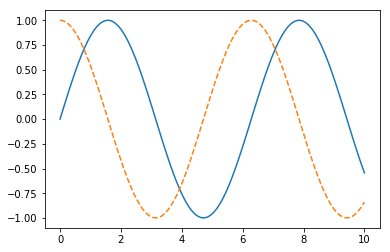

In [3]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Saving Figures to File

Saving a figure using the ``savefig()`` command. To save the previous figure as a PNG file, you can run this:

In [4]:
fig.savefig('my_figure.png')

We now have a file called ``my_figure.png`` in the current working directory:

In [5]:
!ls -lh my_figure.png

-rw-rw-r-- 1 bjpcjp bjpcjp 23K Nov 28 16:40 my_figure.png


### Displaying this Image File

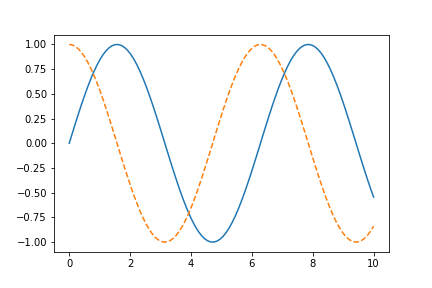

In [6]:
from IPython.display import Image
Image('my_figure.png')

### Get List of supported file types for your System
In ``savefig()``, the file format is inferred from the filename extension.

In [7]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

Note that when saving your figure, it's not necessary to use ``plt.show()`` or related commands discussed earlier.

### MATLAB-style Interface

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the pyplot (``plt``) interface.
For example, the following code will probably look quite familiar to MATLAB users:

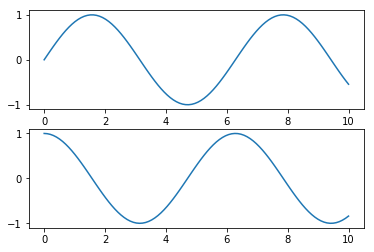

In [8]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

This interface is *stateful*. (It tracks the "current" figure and axes, which are where all ``plt`` commands are applied.) You access state info via the ``plt.gcf()`` (get current figure) and ``plt.gca()`` (get current axes) routines.

While this is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, how can we go back and add something to the first? Fortunately, there is a better way.

### Object-oriented interface

The object-oriented interface is available for more complicated situations, and for when you want more control over your figure. It uses plotting functions that are *methods* of explicit ``Figure`` and ``Axes`` objects. To re-create the previous plot using this style of plotting, you might do the following:

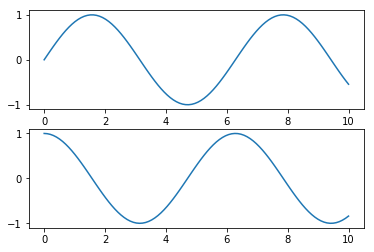

In [9]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

<!--NAVIGATION-->
< [Further Resources](03.13-Further-Resources.ipynb) | [Contents](Index.ipynb) | [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) >